**Source location** : https://datacatalog.worldbank.org/search/dataset/0038973/Education-Attainment-and-Enrollment-around-the-World

Dataset last updated: Feb 23, 2023

The following is the provided description of the dataset provided at the source location:

"An international database with aggregate indicators on education attainment and enrollment derived from household surveys from around the developing world. Indicators include attainment by grade, enrollment by age, and education “survival” by grade among others. Disaggregations include gender, rural/urban, and socioeconomic status."

rows: 627 (including header in count), cols: 4816

- Sheet 1: Data
- Sheet 2: Variable List

size: 24.7 MB

**Hypotheses**:
- In countries with large wealth gaps, there is a correlated gap in education attainment
- Those in rural areas stop education / have lower education attainment than those in urban areas

**South Asian countries of focus**:
- Pakistan
- Nepal
- Bangladesh
- India

**Please note: There is no regression analysis done on the Quintile/ Grade analysis because of how the data itself is set up. Year does not correspond to the age of the students or the grade year, but instead it applies to the report year making regression analysis require additional rows to be added in order to find a correlation between grade and attainments in different quintiles**

- execute jupyter notebook in order as some of the dataframe variable names are reused because the methods were the same. Might end up with incorrect result if executed out of order

Import necessary libraries and load dataset.


Version Information:
- Python: 3.10.2
- Pandas : 1.4.1
- Numpy: 1.22.3
- matplotlib: 3.5.1
- seaborn: 0.12.1

*Dataset should be downloaded and located in the same folder as the jupyter notebook*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
filename = "edattainxtry_5plus_new.xlsx"
start_time = time.time() # Stamp time to get duration of file reading

df_data = pd.read_excel(filename,sheet_name='data')
df_varList = pd.read_excel(filename,sheet_name='variable_list')

print("Duration of file reading: ", time.time() - start_time, " seconds")

Duration of file reading:  36.08617901802063  seconds


In [3]:
# Basic info on the shape of each sheets respective dataframe
print("Rows and Cols in DataFrame for Data: ", df_data.shape,'\n')
print(df_data.info())

print("\nRows and Cols in DataFrame for Variable List: ", df_varList.shape,'\n')
print(df_varList.info())

Rows and Cols in DataFrame for Data:  (626, 4816) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Columns: 4816 entries, country to cl_tQuint5Fx_24
dtypes: float64(4791), int64(6), object(19)
memory usage: 23.0+ MB
None

Rows and Cols in DataFrame for Variable List:  (4816, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  4816 non-null   int64 
 1   name      4816 non-null   object
 2   type      4816 non-null   object
 3   varlab    4815 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.6+ KB
None


**1. First task is to narrow down our data frame to include only countries of interests by creating a subset of all rows  whose 'country' coulumn is not within our scope of interest**
- can see with the output that doing so significantly reduces the number of rows within the dataframe

In [4]:
countries = ['Pakistan', 'Bangladesh', 'India', 'Nepal']

df_countries = df_data[df_data['country'].isin(countries)]
df_countries

**2. Create subset dataframes instead of dropping columns of the dataset**
- the necessary columns needed for each of the countries are as follows with their respective listed descriptions

- There are documented grades 1-9 attainment values, for 4 different age groups 
    - Percentage of the population ages 15 to 19 that has completed each grade (grades 1 to 9); a..
    - Percentage of the population ages 20 to 29 that has completed each grade (grades 1 to 9); a2..
    - Percentage of the population ages 30 to 39 that has completed each grade (grades 1 to 9); a3..
    - Percentage of the population ages 40 to 49 that has completed each grade (grades 1 to 9); a4..

In [19]:
# attainment by age group for grade levels 1-9 is provided as a starting point to see any overarching trends
a = ['year','aAll_1','aAll_2','aAll_3','aAll_4','aAll_5','aAll_6','aAll_7','aAll_8','aAll_9']
a2 = ['year','a2All_1','a2All_2','a2All_3','a2All_4','a2All_5','a2All_6','a2All_7','a2All_8','a2All_9']
a3 = ['year','a3All_1','a3All_2','a3All_3','a3All_4','a3All_5','a3All_6','a3All_7','a3All_8','a3All_9']
a4 = ['year','a4All_1','a4All_2','a4All_3','a4All_4','a4All_5','a4All_6','a4All_7','a4All_8','a4All_9']

In [20]:
# subset dataframes for each country
pak = df_data[df_data['country']== 'Pakistan']
nep = df_data[df_data['country']== 'Nepal']
ind = df_data[df_data['country']== 'India']
ban = df_data[df_data['country']== 'Bangladesh']


**3. Graphing Attainment for all Age groups
- y axis: grade level
- x axis: attainment rate
- The year for each of the countries will be the year closest to each other AND most recent. The hypotheses do not include an analysis over time or comparions of each countries. But instead, takes a region of the same continent and analyzes grade attainment vs wealth, as well as urban vs rural education attainment. Using the most recent years in the dataset gives the most up to date picture on the current condition of attainment, but also allows the data to still be in the same year range to be fairer in depictions of the attainment rates.
    - Pakistan: 2017
    - India: 2020
    - Bangladesh: 2019
    - Nepal: 2019
    
- While visualizations of attainemnt for ALL variables will be shows for the 4 age groups, for the sake of the time retraints of this project, quintile analysis and urban/rural analysis will be done only the **the first age group**.

**Observations for 4 'a#All' graphs below:**
- all of them show a downward trend in education attainment, especially past grade 5/ primary school years.
- compared to groups 4 and 3, group 2 and 1 have higher attainments on the scale meaning that more of the younger generations are attending school even though the attainment still drops as the grade level gets higher

source for iloc: https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

([<matplotlib.axis.XTick at 0x130ed8070>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9')])

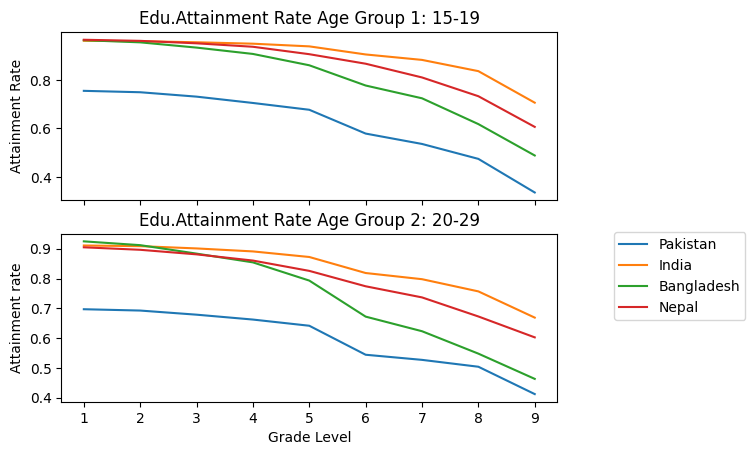

In [7]:
# initialize the transposed data frame for each countries subset data in order to use grade level as x axis
tpak, tind, tban, tnep = pak[a].T, ind[a].T, ban[a].T, nep[a].T

fig, axis = plt.subplots(2,sharex=True)

# AGE GROUP 1 GRAPH
# index 4 for col location is for year 2017, Pakistan
axis[0].plot(tpak.iloc[1:,4].index, pak[a].T.iloc[1:,4] )
# index 4 for col location is for year 2020, India
axis[0].plot(tind.iloc[1:,4].index, ind[a].T.iloc[1:,4] )
# index 11 for col location is for year 2019, Bangladesh
axis[0].plot(tban.iloc[1:,4].index, ban[a].T.iloc[1:,11] )
# index 9 for col location is for year 2020, Nepal
axis[0].plot(tnep.iloc[1:,4].index, nep[a].T.iloc[1:,9] )
axis[0].set_title('Edu.Attainment Rate Age Group 1: 15-19')
axis[0].set(ylabel='Attainment Rate')


# AGE GROUP 2 GRAPH
axis[1].plot(tpak.iloc[1:,4].index, pak[a2].T.iloc[1:,4] )
axis[1].plot(tind.iloc[1:,4].index, ind[a2].T.iloc[1:,4] )
axis[1].plot(tban.iloc[1:,4].index, ban[a2].T.iloc[1:,11] )
axis[1].plot(tnep.iloc[1:,4].index, nep[a2].T.iloc[1:,9] )
axis[1].set_title('Edu.Attainment Rate Age Group 2: 20-29')

# graph labels
plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.legend(['Pakistan','India','Bangladesh','Nepal'], bbox_to_anchor=(1.1, 1.05))
plt.xticks(tpak.iloc[1:,4].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade

([<matplotlib.axis.XTick at 0x13200d4b0>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9')])

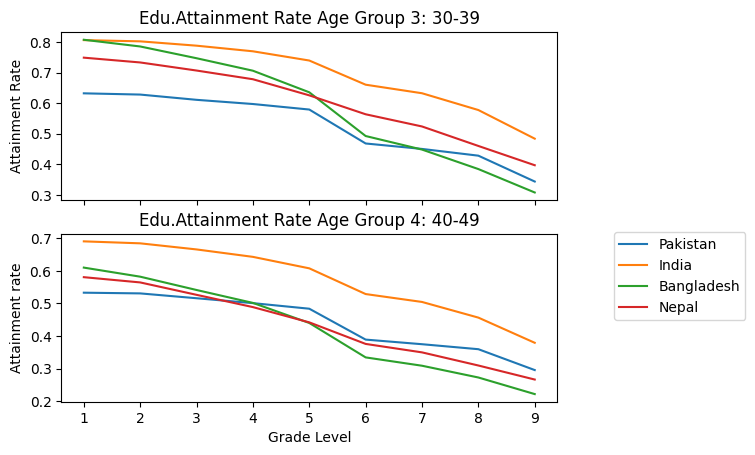

In [8]:
fig, axis = plt.subplots(2,sharex=True)

# AGE GROUP 3 GRAPH
# index 4 for col location is for year 2017, Pakistan
axis[0].plot(tpak.iloc[1:,4].index, pak[a3].T.iloc[1:,4] )
# index 4 for col location is for year 2020, India
axis[0].plot(tind.iloc[1:,4].index, ind[a3].T.iloc[1:,4] )
# index 11 for col location is for year 2019, Bangladesh
axis[0].plot(tban.iloc[1:,4].index, ban[a3].T.iloc[1:,11] )
# index 9 for col location is for year 2020, Nepal
axis[0].plot(tnep.iloc[1:,4].index, nep[a3].T.iloc[1:,9] )
axis[0].set_title('Edu.Attainment Rate Age Group 3: 30-39')
axis[0].set(ylabel='Attainment Rate')


# AGE GROUP 4 GRAPH
axis[1].plot(tpak.iloc[1:,4].index, pak[a4].T.iloc[1:,4] )
axis[1].plot(tind.iloc[1:,4].index, ind[a4].T.iloc[1:,4] )
axis[1].plot(tban.iloc[1:,4].index, ban[a4].T.iloc[1:,11] )
axis[1].plot(tnep.iloc[1:,4].index, nep[a4].T.iloc[1:,9] )
axis[1].set_title('Edu.Attainment Rate Age Group 4: 40-49')

# graph labels
plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.legend(['Pakistan','India','Bangladesh','Nepal'], bbox_to_anchor=(1.1, 1.05))
plt.xticks(tpak.iloc[1:,4].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade


**Above viz show Education attainment (ALL) for each age group show large decreases in education attainment past Grade 5 level schooling** 

Below we will see if factors such as wealth and geographical location also show the same patterns that would contribute to the decrease of attainment.
- 'q#' : each variable # corresponds to its respective wealth quintile, 
    - Quintiles 1 - 5, with 1 being the poorest and 5 being the richest quantile
        - example: aQuint1_1 -  Attain grade 1:Ages 15-19:Poorest quintile (1)
        - goes from grades 1 - 9

**Hypothesis 1: Those in lower wealth quantiles have a lower and correlated gap in education attainment than the wealthier quintiles.**
1. Step 1: define all the cols for each grade/quintile pair for age group 1 (age group of focus) 15-19 years old
2. Step 2: Pakistan, India, Bangladesh, Nepal 
   - The countries subsets are norrowed using the defined columns from step 1, Transposed in order to make them into plottable rows with the grade level as the x value, and y value as the attainment rate of that quintile/grade level pair
3. Step 3: Regression lines not applied as a new row of corresponding grades would need to be added in order to make the independent value the grade level, and dependent the attainment rate. The year corresponds to the report release and not the ages or grades of the students so I cannot use that as a variable for regression. Since my hypothesis use grade as a variable, and that variable does not exist outside of the col names (due to time I did not add it in here).
    - however, regression lines where I do add the 'grade' row are available for urban/rural comparisons as it only has 2 factors that need to be focused on. 

In [9]:
# quantile analysis for this dataset will only be education attainment for ages 15-19
# 'aAll_1' is actually not necessary in these quintile lists.I used for initial analysis. Taking it out will
# mess up the indexing for the rest of the project so I just kept it in. 

q1 = ['country','year','aAll_1','aQuint1_1','aQuint1_2','aQuint1_3','aQuint1_4','aQuint1_5','aQuint1_6','aQuint1_7','aQuint1_8','aQuint1_9']
q2 = ['country','year','aAll_1','aQuint2_1','aQuint2_2','aQuint2_3','aQuint2_4','aQuint2_5','aQuint2_6','aQuint2_7','aQuint2_8','aQuint2_9']
q3 = ['country','year','aAll_1','aQuint3_1','aQuint3_2','aQuint3_3','aQuint3_4','aQuint3_5','aQuint3_6','aQuint3_7','aQuint3_8','aQuint3_9']
q4 = ['country','year','aAll_1','aQuint4_1','aQuint4_2','aQuint4_3','aQuint4_4','aQuint4_5','aQuint4_6','aQuint4_7','aQuint4_8','aQuint4_9']
q5 = ['country','year','aAll_1','aQuint5_1','aQuint5_2','aQuint5_3','aQuint5_4','aQuint5_5','aQuint5_6','aQuint5_7','aQuint5_8','aQuint5_9']

([<matplotlib.axis.XTick at 0x1329745e0>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9')])

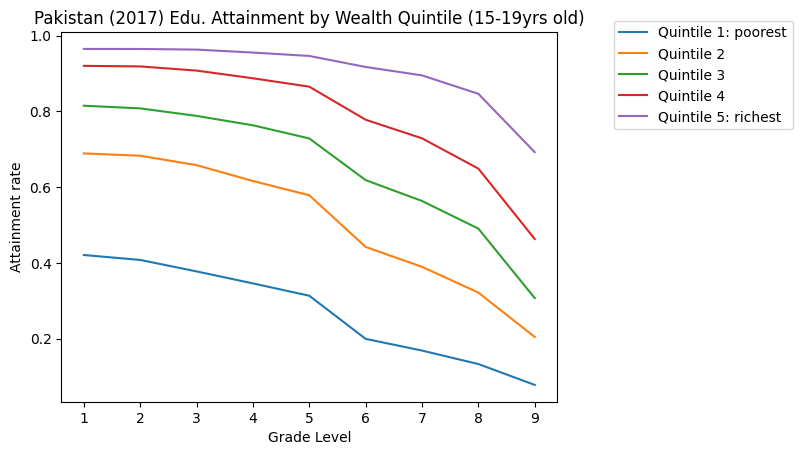

In [10]:
# using the same x value indexes for grade level, with the different quintile attainment rates 
# col 4 for year 2017
# starting from row 4 of transpose for quintile data, ignoring the first 3 indexes because they are not relevent to the plot
plt.plot(pak[q1].T.iloc[3:,4].index, pak[q1].T.iloc[3:,4] )
plt.plot(pak[q1].T.iloc[3:,4].index, pak[q2].T.iloc[3:,4] )
plt.plot(pak[q1].T.iloc[3:,4].index, pak[q3].T.iloc[3:,4] )
plt.plot(pak[q1].T.iloc[3:,4].index, pak[q4].T.iloc[3:,4] )
plt.plot(pak[q1].T.iloc[3:,4].index, pak[q5].T.iloc[3:,4] )
# in order for the plotted lines to show in the same range, q1's col names are used for consistency
# since the labels for grade are different for each quintile

plt.title("Pakistan (2017) Edu. Attainment by Wealth Quintile (15-19yrs old)")
plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.legend(['Quintile 1: poorest','Quintile 2','Quintile 3','Quintile 4','Quintile 5: richest'], bbox_to_anchor=(1.1, 1.05))
plt.xticks(pak[q1].T.iloc[3:,4].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade

Pakistan in comparison with the other countries below has the largest attainment gap between quintiles for each grade
while also showing a downward trend for attainment

([<matplotlib.axis.XTick at 0x13291b0a0>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9')])

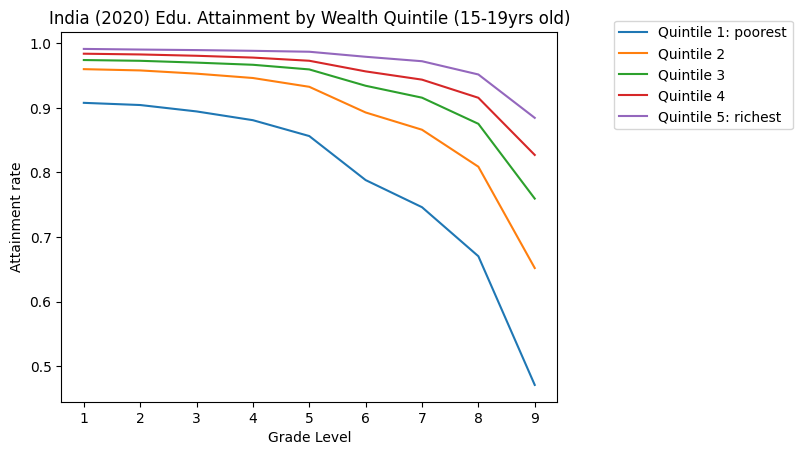

In [11]:
#using col 4, for year 2020
plt.plot(ind[q1].T.iloc[3:,4].index, ind[q1].T.iloc[3:,4] )
plt.plot(ind[q1].T.iloc[3:,4].index, ind[q2].T.iloc[3:,4] )
plt.plot(ind[q1].T.iloc[3:,4].index, ind[q3].T.iloc[3:,4] )
plt.plot(ind[q1].T.iloc[3:,4].index, ind[q4].T.iloc[3:,4] )
plt.plot(ind[q1].T.iloc[3:,4].index, ind[q5].T.iloc[3:,4] )

plt.title("India (2020) Edu. Attainment by Wealth Quintile (15-19yrs old)")
plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.legend(['Quintile 1: poorest','Quintile 2','Quintile 3','Quintile 4','Quintile 5: richest'], bbox_to_anchor=(1.1, 1.05))
plt.xticks(ind[q1].T.iloc[3:,4].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade

All countries but Pakistan have each quantile with similar attainment rates in the first 5 grade levels. 
More research shows it is because Nepal, Bangladesh, and India have some sort of free schooling/ mandatary school provided from the government up till or even some past the first 5 grades. That is why Pakistans education attainment has larger gaps between its wealth quintiles because Pakistan is reported to only have free and compulsory education for their primary school from ages 5 to 9. Whereas, the data here applies to the ages 15 to 19 years old. 

Sources:
- https://pide.org.pk/research/primary-education-in-pakistan-2/
- https://lancersarmyschools.com/why-has-the-government-made-primary-education-compulsory-in-india/

([<matplotlib.axis.XTick at 0x13137f280>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9')])

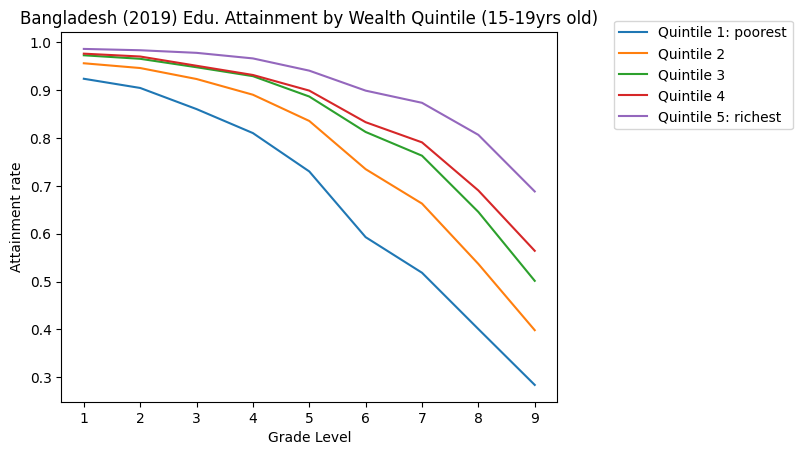

In [12]:
# 11th col for the transposed df coressponds to the year 2019
plt.plot(ban[q1].T.iloc[3:,11].index, ban[q1].T.iloc[3:,11] )
plt.plot(ban[q1].T.iloc[3:,11].index, ban[q2].T.iloc[3:,11] )
plt.plot(ban[q1].T.iloc[3:,11].index, ban[q3].T.iloc[3:,11] )
plt.plot(ban[q1].T.iloc[3:,11].index, ban[q4].T.iloc[3:,11] )
plt.plot(ban[q1].T.iloc[3:,11].index, ban[q5].T.iloc[3:,11] )

plt.title("Bangladesh (2019) Edu. Attainment by Wealth Quintile (15-19yrs old)")
plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.legend(['Quintile 1: poorest','Quintile 2','Quintile 3','Quintile 4','Quintile 5: richest'], bbox_to_anchor=(1.1, 1.05))
plt.xticks(ban[q1].T.iloc[3:,11].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade

([<matplotlib.axis.XTick at 0x130b78730>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9')])

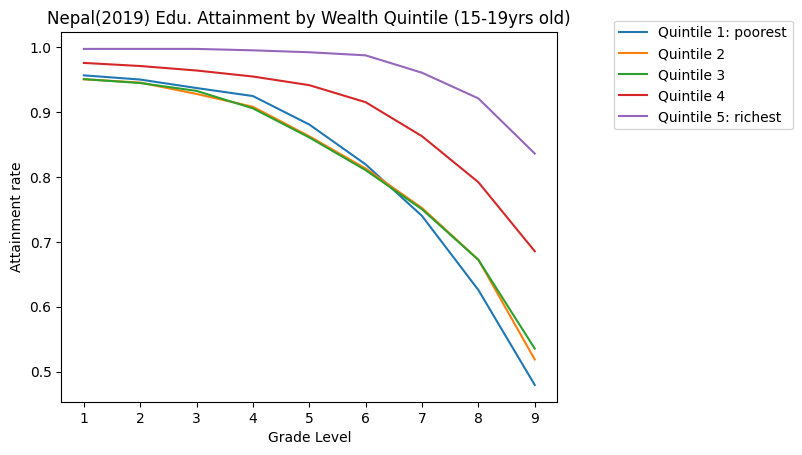

In [13]:
# 9th col for the transposed df coressponds to the year 2019
plt.plot(nep[q1].T.iloc[3:,9].index, nep[q1].T.iloc[3:,9] )
plt.plot(nep[q1].T.iloc[3:,9].index, nep[q2].T.iloc[3:,9] )
plt.plot(nep[q1].T.iloc[3:,9].index, nep[q3].T.iloc[3:,9] )
plt.plot(nep[q1].T.iloc[3:,9].index, nep[q4].T.iloc[3:,9] )
plt.plot(nep[q1].T.iloc[3:,9].index, nep[q5].T.iloc[3:,9] )

plt.title("Nepal(2019) Edu. Attainment by Wealth Quintile (15-19yrs old)")
plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.legend(['Quintile 1: poorest','Quintile 2','Quintile 3','Quintile 4','Quintile 5: richest'], bbox_to_anchor=(1.1, 1.05))
plt.xticks(nep[q1].T.iloc[3:,9].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade


For each country above, there is a clear difference at the initial attainment of grade 1 level schooling,
but the difference between quintiles grows as we increase the grade level. The gap of wealth related attainment grows and attainment of education itself goes down for each quintile. However, the difference between the richest and poorest quintiles is still dramatic for each country.

- There is a correlated gap of education attainment and wealth quintile, especially beyond the primary school years
- Nepal seems like an exception where the lowest 3 quantiles all have relatively the same attainment rates with some overlapping - but the highest 2 quintiles still take the lead on attainment despite all having a downward trend

**Correlation between year and expenditure per student**
- Seeing the correlation between quintiles and current GNI per capita in all all the different quintiles and grades - there is a close to 1 (between .8-1) positive correlation between the two. This does not prove causation of higher GNI ->higher attainment rates. However, it does show that might be related

In [14]:
# can replace q1 and any of the above q1-q5 arrays for different quintile correlation values
# example correlations
ban[q1+['gnipcp']].corr()
# nep[q1+['gnipcp']].corr()
# pak[q5+['gnipcp']].corr()
# ind[q5+['gnipcp']].corr()

,year,aAll_1,aQuint1_1,aQuint1_2,aQuint1_3,aQuint1_4,aQuint1_5,aQuint1_6,aQuint1_7,aQuint1_8,aQuint1_9,gnipcp
year,1.000000,0.930028,0.946273,0.949180,0.944684,0.936043,0.915914,0.870939,0.848781,0.821037,0.764182,0.944342
aAll_1,0.930028,1.000000,0.881564,0.881606,0.868431,0.849088,0.808392,0.724929,0.687546,0.643945,0.568172,0.822924
aQuint1_1,0.946273,0.881564,1.000000,0.999242,0.997051,0.989771,0.968495,0.929090,0.896660,0.855436,0.788556,0.903243
aQuint1_2,0.949180,0.881606,0.999242,1.000000,0.998841,0.992736,0.975244,0.937351,0.906597,0.866866,0.801407,0.910417
aQuint1_3,0.944684,0.868431,0.997051,0.998841,1.000000,0.996440,0.983057,0.950422,0.922740,0.885676,0.824658,0.917808
aQuint1_4,0.936043,0.849088,0.989771,0.992736,0.996440,1.000000,0.993120,0.965794,0.943938,0.909599,0.853242,0.925852
aQuint1_5,0.915914,0.808392,0.968495,0.975244,0.983057,0.993120,1.000000,0.984741,0.970602,0.944129,0.895968,0.934382
aQuint1_6,0.870939,0.724929,0.929090,0.937351,0.950422,0.965794,0.984741,1.000000,0.995624,0.981981,0.952271,0.941666
aQuint1_7,0.848781,0.687546,0.896660,0.906597,0.922740,0.943938,0.970602,0.995624,1.000000,0.992861,0.973414,0.943284
aQuint1_8,0.821037,0.643945,0.855436,0.866866,0.885676,0.909599,0.944129,0.981981,0.992861,1.000000,0.991151,0.941527


**Hypothesis 2: Those in rural areas have lower education attainment than those in urban areas**
- Again, this will also focus on the first age group (ages 15-19), grades 1-9
- *Notable things about the graphs below*
    - the method of extracting the necessary columns and data are similar to above
    - each graph shows a clear downward attainment rate. As the grade year increases, the attainment rate goes down for both rural and urban areas. However, rural attainment still stays below for 3 out of the 4 countries.
    - In Bangladesh, attainment is similar in the primary school years and then once again rural student education drops. Bangladesh's obersevation makes sense since the data use is from after 2016, in which the government started extending free primary and secondary school for students. source: https://www.worldbank.org/en/results/2016/10/07/ensuring-education-for-all-bangladeshis
    
    
    
- **The linear regression lines shown for each rural and urban pair of each country all have negative slope values. As the grade gets higher, its projected that the education attainment for both rural and urban education gets lower, with rural education consistently being lower than urban attainment**
- the linear regression/ best fit line is using numpy polyfit and polyval.
- source: https://www.youtube.com/watch?v=EMIyRmrPWJQ

In order to complete the linear regression plotting below, it was necessary to make the 'grade' 
row where each cell in that row corresponds to that columns header

ex: aUrban_1 has a grade cell with the value of 1. 

This is an example of a subset for Pakistans data with the grade row, but the dataset is transposed so it shows up as a column at index 0

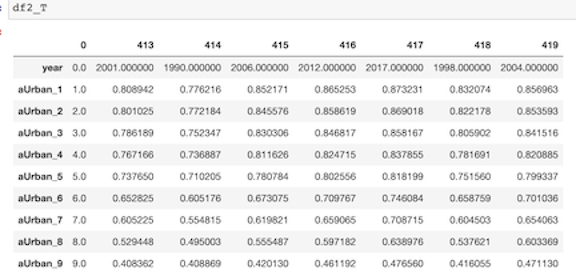

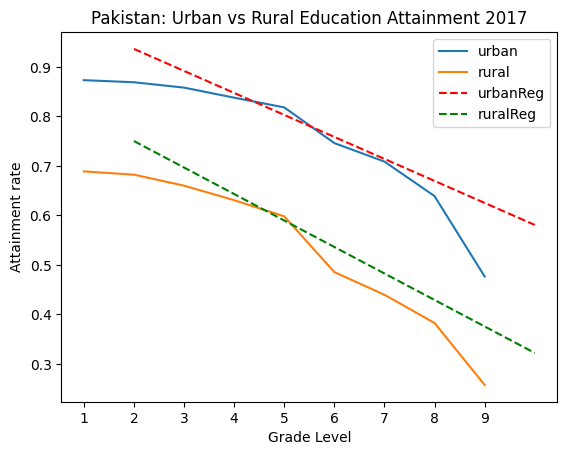

In [15]:
urban = ['year','aUrban_1','aUrban_2','aUrban_3','aUrban_4','aUrban_5','aUrban_6','aUrban_7','aUrban_8','aUrban_9']
rural = ['year','aRural_1','aRural_2','aRural_3','aRural_4','aRural_5','aRural_6','aRural_7','aRural_8','aRural_9']

# to be used to add a 'grade' row, which would give each attainment grade col a numeric value, this is then transposed 
# and used as a col in linear regression analysis

grade = pd.DataFrame({'year':[0],'aUrban_1':[1],'aUrban_2':[2],'aUrban_3':[3],'aUrban_4':[4],'aUrban_5':[5],
         'aUrban_6':[6],'aUrban_7':[7],'aUrban_8':[8],'aUrban_9':[9]})

grade_r = pd.DataFrame({'year':[0],'aRural_1':[1],'aRural_2':[2],'aRural_3':[3],'aRural_4':[4],'aRural_5':[5],
         'aRural_6':[6],'aRural_7':[7],'aRural_8':[8],'aRural_9':[9]})

# indexing at 1 for row parameters so do not include year in the plotted variables
plt.plot(pak[urban].T.iloc[1:,4].index,pak[urban].T.iloc[1:,4])
plt.plot(pak[urban].T.iloc[1:,4].index,pak[rural].T.iloc[1:,4])

plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.title("Pakistan: Urban vs Rural Education Attainment 2017")
plt.xticks(pak[urban].T.iloc[1:,4].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grad

# regressionattempting regression for Urban
dfU = pak[urban]
df2 = pd.concat([grade,dfU])
df2_T = df2.T

#df2.T.iloc[:,0] - are the grade levels in one column in the Transpose that correspond with the column headers
reg = np.polyfit(df2.T.iloc[1:,0], df2.T.iloc[1:,5], deg=1)
trend = np.polyval(reg,df2.T.iloc[1:,0])
plt.plot(df2.T.iloc[1:,0],trend,'r--')

# regression line for rural
dfR = pak[rural]
df3 = pd.concat([grade_r,dfR])
df3_T = df3.T

# the 2019 index increases from 9, like above to 10 since adding a new row of grade values
reg = np.polyfit(df3.T.iloc[1:,0], df3.T.iloc[1:,5], deg=1)
trend = np.polyval(reg,df3.T.iloc[1:,0])
std = df3.T.iloc[1:,5].std()

plt.plot(df3.T.iloc[1:,0],trend,'g--')
plt.legend(['urban','rural', 'urbanReg','ruralReg'])

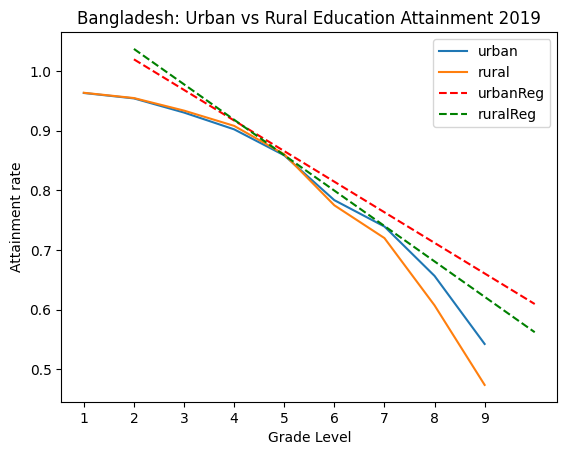

In [16]:
plt.plot(ban[urban].T.iloc[1:,11].index,ban[urban].T.iloc[1:,11])
plt.plot(ban[urban].T.iloc[1:,11].index,ban[rural].T.iloc[1:,11])

plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.title("Bangladesh: Urban vs Rural Education Attainment 2019")
plt.xticks(ban[urban].T.iloc[1:,11].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade

# regressionattempting regression for Urban
dfU = ban[urban]
df2 = pd.concat([grade,dfU])
df2_T = df2.T

#df2.T.iloc[:,0] - are the grade levels in one column in the Transpose that correspond with the column headers
reg = np.polyfit(df2.T.iloc[1:,0], df2.T.iloc[1:,12], deg=1)
trend = np.polyval(reg,df2.T.iloc[1:,0])
plt.plot(df2.T.iloc[1:,0],trend,'r--')

# regression line for rural
dfR = ban[rural]
df3 = pd.concat([grade_r,dfR])
df3_T = df3.T

# the 2019 index increases from 11, to 12 since adding a new row of grade values
reg = np.polyfit(df3.T.iloc[1:,0], df3.T.iloc[1:,12], deg=1)
trend = np.polyval(reg,df3.T.iloc[1:,0])
std = df3.T.iloc[1:,12].std()

plt.plot(df3.T.iloc[1:,0],trend,'g--')
plt.legend(['urban','rural', 'urbanReg','ruralReg'])

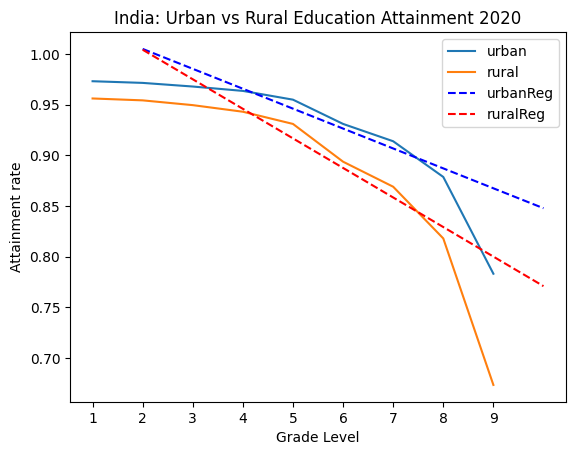

In [17]:
plt.plot(ind[urban].T.iloc[1:,4].index,ind[urban].T.iloc[1:,4])
plt.plot(ind[urban].T.iloc[1:,4].index,ind[rural].T.iloc[1:,4])


plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.title("India: Urban vs Rural Education Attainment 2020")
plt.xticks(ind[urban].T.iloc[1:,4].index, labels=[1,2,3,4,5,6,7,8,9]) #instead of using 'aAll_1' etc, use alias of corresponding grade

# regressionattempting regression for Urban
dfU = ind[urban]
df2 = pd.concat([grade,dfU])
df2_T = df2.T

#df2.T.iloc[:,0] - are the grade levels in one column in the Transpose that correspond with the column headers
reg = np.polyfit(df2.T.iloc[1:,0], df2.T.iloc[1:,5], deg=1)
trend = np.polyval(reg,df2.T.iloc[1:,0])
plt.plot(df2.T.iloc[1:,0],trend,'b--')

# regression line for rural
dfR = ind[rural]
df3 = pd.concat([grade_r,dfR])
df3_T = df3.T

# the 2019 index increases from 11, to 12 since adding a new row of grade values
reg = np.polyfit(df3.T.iloc[1:,0], df3.T.iloc[1:,5], deg=1)
trend = np.polyval(reg,df3.T.iloc[1:,0])
std = df3.T.iloc[1:,5].std()

plt.plot(df3.T.iloc[1:,0],trend,'r--')
plt.legend(['urban','rural', 'urbanReg','ruralReg'])

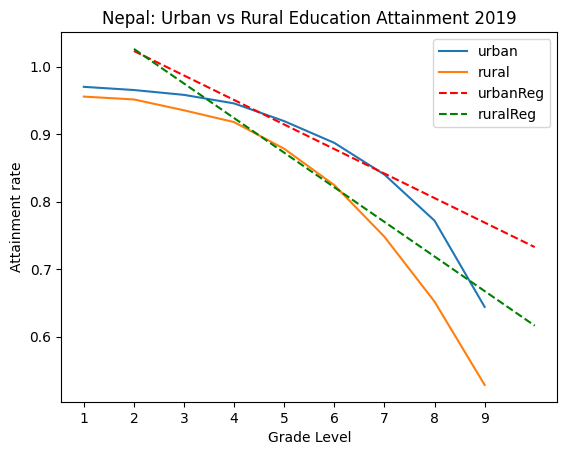

In [18]:
plt.plot(nep[urban].T.iloc[1:,9].index,nep[urban].T.iloc[1:,9])
plt.plot(nep[urban].T.iloc[1:,9].index,nep[rural].T.iloc[1:,9])


plt.xlabel("Grade Level")
plt.ylabel("Attainment rate")
plt.title("Nepal: Urban vs Rural Education Attainment 2019")
plt.xticks(nep[urban].T.iloc[1:,9].index, labels=[1,2,3,4,5,6,7,8,9]) 


# attempting regression for Urban
dfU = nep[urban]
df2 = pd.concat([grade,dfU])
df2_T = df2.T

#df2.T.iloc[:,0] - are the grade levels in one column in the Transpose that correspond with the column headers
reg = np.polyfit(df2.T.iloc[1:,0], df2.T.iloc[1:,10], deg=1)
trend = np.polyval(reg,df2.T.iloc[1:,0])
plt.plot(df2.T.iloc[1:,0],trend,'r--')


# regression line for rural
dfR = nep[rural]
df3 = pd.concat([grade_r,dfR])
df3_T = df3.T

# the 2019 index increases from 9, like above to 10 since adding a new row of grade values
reg = np.polyfit(df3.T.iloc[1:,0], df3.T.iloc[1:,10], deg=1)
trend = np.polyval(reg,df3.T.iloc[1:,0])
std = df3.T.iloc[1:,10].std()

plt.plot(df3.T.iloc[1:,0],trend,'g--')
# plt.plot(df3.T.iloc[:,0],trend-std,'b--') # these plot the std dev lines for rural, can be replicated for urban.
# plt.plot(df3.T.iloc[:,0],trend+std,'p--') # the standard deviation is quite large, so I do not plot it here

plt.legend(['urban','rural', 'urbanReg','ruralReg'])

**Correlation Between ALL education attainment and expenditure for primary, secondary, and tertiary per capita**
a - list from before
exppsp Expenditure per student, primary (% of GDP per capita)
exppss Expenditure per student, secondary (% of GDP per capita)
exppst Expenditure per student, tertiary (% of GDP per capita)

would be useful to see how much expenditure is per capita for each age group to drive point of weath gaps playing a role in decreased attainment, but too many null values were present for the above 3 variables in each countries dataset